In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../clean_tweet.csv')

In [3]:
df.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
0,0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,188.0,43.0,davideiacovozzi,18,18,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN,rt northstarchart the yield tell us there high...
1,1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,179.0,32.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN,rt michaelaarouet german mortgag rate went can...
2,2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,193.0,26.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",NaN,rt goldseek when
3,3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,620.0,213.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN,rt charliebilello the mortgag rate us rise hig...
4,4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,1787.0,417.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",NaN,rt biancoresearch rate rise someth break anyth...


In [4]:
def condition(x):
    if x>0:
        return "positive"
    elif x == 0:
        return "neutral"
    else:
        return 'negative'

In [5]:
df['sentiment'] = df['polarity'].apply(condition)


In [6]:
df.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favourite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text,sentiment
0,0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,188.0,43.0,davideiacovozzi,18,18,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN,rt northstarchart the yield tell us there high...,positive
1,1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,179.0,32.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN,rt michaelaarouet german mortgag rate went can...,positive
2,2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,193.0,26.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",NaN,rt goldseek when,neutral
3,3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,620.0,213.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN,rt charliebilello the mortgag rate us rise hig...,neutral
4,4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,1787.0,417.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",NaN,rt biancoresearch rate rise someth break anyth...,negative


In [7]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 


6.0
4.0


<AxesSubplot:ylabel='sentiment'>

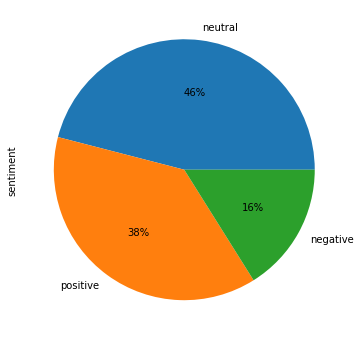

In [8]:
df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')


In [9]:
# Filter negative tweets
negative_tweets = df[df.sentiment == 'negative']

In [28]:
# Filter positive tweets
positive_tweets = df[df.sentiment == 'positive']

In [10]:
top_10_countries_with_negative_polarity = negative_tweets.groupby('place')['sentiment'].value_counts().nlargest(10,  'first')

In [11]:
top_10_countries_with_negative_polarity.head(10)

place                   sentiment
India                   negative     73
Canada                  negative     56
United States           negative     41
Raiganj,UttarDinajpur   negative     40
Ireland                 negative     36
London, England         negative     34
New Delhi               negative     28
Sri Lanka               negative     23
Mumbai                  negative     21
United Kingdom          negative     20
Name: sentiment, dtype: int64

<AxesSubplot:title={'center':'Top 10 Countries with Negative Polarity'}, xlabel='place,sentiment'>

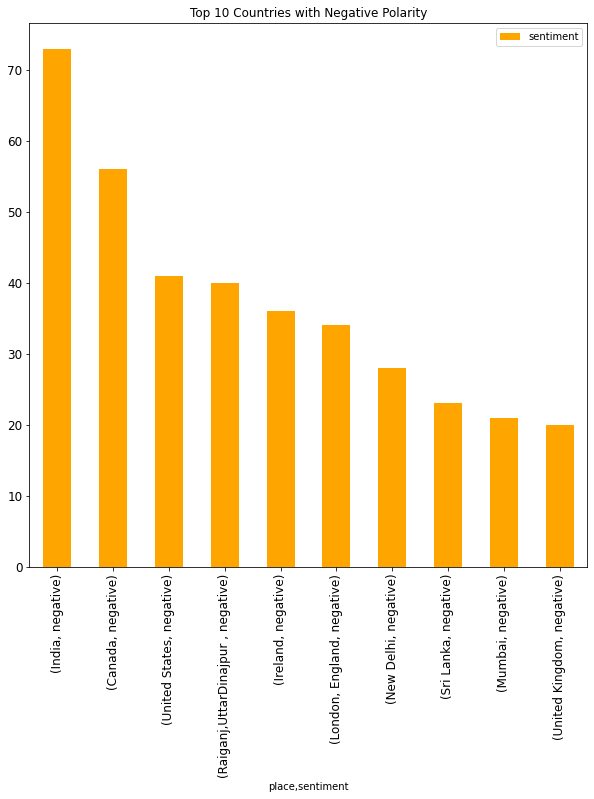

In [27]:
top_10_countries_with_negative_polarity.plot(kind='bar', figsize=(10,10), color='orange', title='Top 10 Countries with Negative Polarity', legend=True, fontsize=12)

In [29]:
top_10_countries_with_positive_polarity = positive_tweets.groupby('place')['sentiment'].value_counts().nlargest(10,  'first')

<AxesSubplot:title={'center':'Top 10 Countries with Positive Polarity'}, xlabel='place,sentiment'>

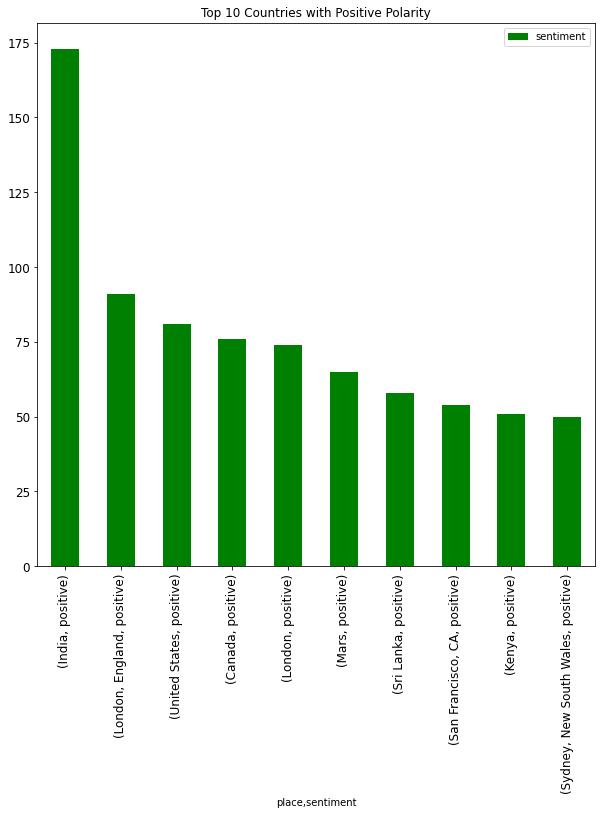

In [30]:
top_10_countries_with_positive_polarity.plot(kind='bar', figsize=(10,10), color='green', title='Top 10 Countries with Positive Polarity', legend=True, fontsize=12)

In [44]:
# Get top 10 authors who have tweeted negative
top_10_authors_with_negative_polarity = negative_tweets.groupby('original_author')['sentiment'].value_counts().nlargest(10,  'first')

In [45]:
top_10_authors_with_negative_polarity.head(10)

original_author  sentiment
AitcRupak        negative     40
vicconsult       negative     39
Pick_A_Pump      negative     22
MariaMo32975161  negative     18
dr_bjpee         negative     18
MercuryReports   negative     17
gdesmaha         negative     16
GETAnalysis      negative     15
OffensivelyP     negative     15
PatFNelson       negative     15
Name: sentiment, dtype: int64

<AxesSubplot:title={'center':'Top 10 Countries with Positive Polarity'}, xlabel='original_author,sentiment'>

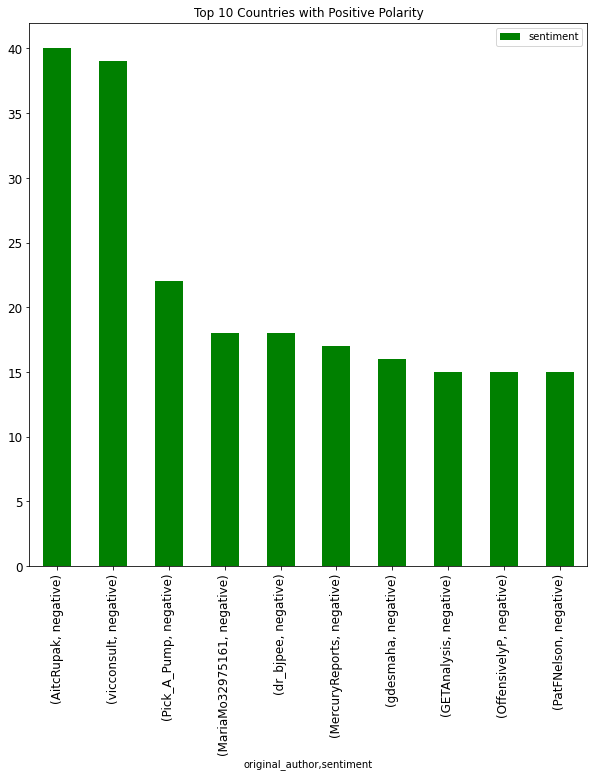

In [46]:
# PLot top 10 authors with negative polarity
top_10_authors_with_negative_polarity.plot(kind='bar', figsize=(10,10), color='green', title='Top 10 Countries with Positive Polarity', legend=True, fontsize=12)

In [57]:
# Get top 10 authors who have tweeted negative
top_10_authors_with_positive_polarity = positive_tweets.groupby('original_author')['sentiment'].value_counts().nlargest(10,  'first')


In [59]:
top_10_authors_with_positive_polarity.head(10)

original_author  sentiment
RewardStrategy   positive     48
annabellas69     positive     46
pastexpiry       positive     45
scoin800         positive     40
AilsaForshaw     positive     37
RHADeclan        positive     32
bowserbuddy711   positive     32
Patriot58165181  positive     30
datoms_iot       positive     30
JaWo1245         positive     29
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='original_author,sentiment'>

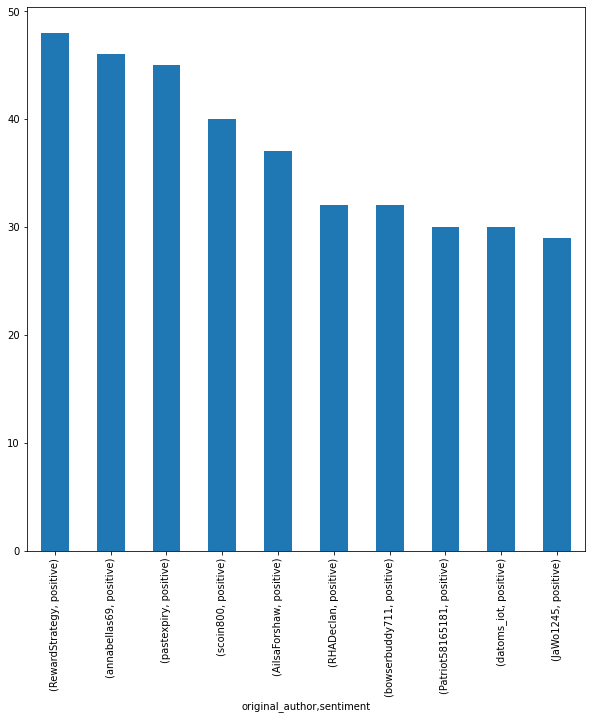

In [58]:
# plot top 10 authors with positive polarity
top_10_authors_with_positive_polarity.plot(kind='bar', figsize=(10,10))